# Problem Statement

Customer Churn is a burning problem for Telecom companies. Almost every telecom company pays a premium to get a customer on-board. Customer churn is a directly impacts company’s revenue.
  
In this case-study, we simulate one such case of customer churn where we work on a data of post-paid customers with a contract. The data has information about customer usage behaviour, contract details, and payment details. The data also indicates which were the customers who cancelled their service.  
  
Based on this past data, Perform an EDA and build a model which can predict whether a customer will cancel their service in the future or not.

# Data Dictionary

* <b>Churn</b> - 1 if customer cancelled service, 0 if not
* <b>AccountWeeks</b> - number of weeks customer has had active account
* <b>ContractRenewal</b> - 1 if customer recently renewed contract, 0 if not
* <b>DataPlan</b> - 1 if customer has data plan, 0 if not
* <b>DataUsage</b> - gigabytes of monthly data usage
* <b>CustServCalls</b> - number of calls into customer service
* <b>DayMins</b> - average daytime minutes per month
* <b>DayCalls</b> - average number of daytime calls
* <b>MonthlyCharge</b> - average monthly bill
* <b>OverageFee</b> - largest overage fee in last 12 months
* <b>RoamMins</b> - average number of roaming minutes


In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [3]:
cell_df = pd.read_excel("Cellphone.xlsx")

## EDA

In [4]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [5]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3303 non-null   float64
 2   ContractRenewal  3315 non-null   float64
 3   DataPlan         3324 non-null   float64
 4   DataUsage        3317 non-null   float64
 5   CustServCalls    3281 non-null   float64
 6   DayMins          3298 non-null   float64
 7   DayCalls         3322 non-null   float64
 8   MonthlyCharge    3320 non-null   float64
 9   OverageFee       3309 non-null   float64
 10  RoamMins         3326 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 286.6 KB


In [7]:
cell_df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']].describe().T

,count,mean,std,min,25%,50%,75%,max
AccountWeeks,3303.0,101.159552,39.879736,1.0,74.00,101.00,127.000,243.00
DataUsage,3317.0,0.814827,1.270329,0.0,0.00,0.00,1.780,5.40
CustServCalls,3281.0,1.563852,1.318590,0.0,1.00,1.00,2.000,9.00
DayMins,3298.0,179.863069,54.581440,0.0,143.70,179.60,216.700,350.80
DayCalls,3322.0,100.434377,20.079248,0.0,87.00,101.00,114.000,165.00
MonthlyCharge,3320.0,56.288735,16.438343,14.0,45.00,53.50,66.125,111.30
OverageFee,3309.0,10.048598,2.539063,0.0,8.33,10.07,11.770,18.19
RoamMins,3326.0,10.237974,2.793192,0.0,8.50,10.30,12.100,20.00


### Check for Missing values

In [8]:
cell_df.isnull().sum()

Churn               0
AccountWeeks       30
ContractRenewal    18
DataPlan            9
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

### Imputing missing values

In [9]:
cell_df['DataPlan'].value_counts()

0.0    2405
1.0     919
Name: DataPlan, dtype: int64

In [10]:
cell_df['DataPlan'].mode()[0]

0    0.0
dtype: float64

In [12]:
cols = ['ContractRenewal','DataPlan']
for column in cols:
    print(column)
    mode_1 = cell_df[column].mode()[0]
    print(mode_1)
    cell_df[column].fillna(value=mode_1,inplace=True)

ContractRenewal
1.0
DataPlan
0.0


In [13]:
cell_df.isnull().sum()

Churn               0
AccountWeeks       30
ContractRenewal     0
DataPlan            0
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

In [16]:
SI = SimpleImputer(strategy='median')

In [17]:
SI.fit_transform(cell_df)

array([[  1.  , 108.  ,   0.  , ...,  41.8 ,  10.57,  13.8 ],
       [  0.  , 113.  ,   1.  , ...,  55.9 ,   6.71,  13.3 ],
       [  0.  , 101.  ,   1.  , ...,  60.  ,   9.24,  13.5 ],
       ...,
       [  0.  ,  82.  ,   1.  , ...,  31.  ,   7.78,  13.3 ],
       [  0.  , 182.  ,   1.  , ...,  48.5 ,   8.75,   9.7 ],
       [  0.  , 100.  ,   1.  , ...,  79.6 ,  11.81,   8.  ]])

In [18]:
cell_df = pd.DataFrame(SI.fit_transform(cell_df),columns=cell_df.columns)

In [19]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [20]:
cell_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Checking for Duplicates

In [21]:
# Are there any duplicates ?
dups = cell_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Proportion in the Target classes

In [22]:
cell_df.Churn.value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: Churn, dtype: float64

### Distribution of the variables Check

In [23]:
from pylab import rcParams

In [25]:
rcParams['figure.figsize'] = 15,8

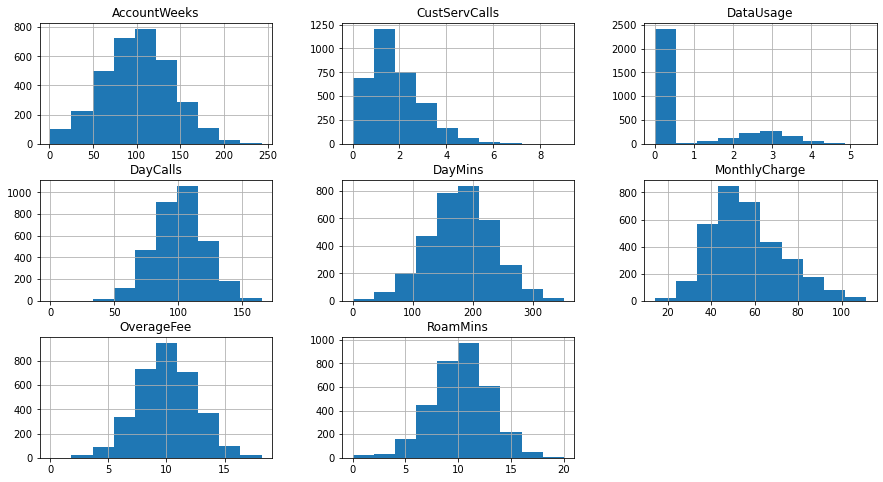

In [26]:
cell_df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']].hist();

### Outlier Checks

In [27]:
rcParams['figure.figsize'] = 8,4

import warnings
warnings.filterwarnings('ignore')

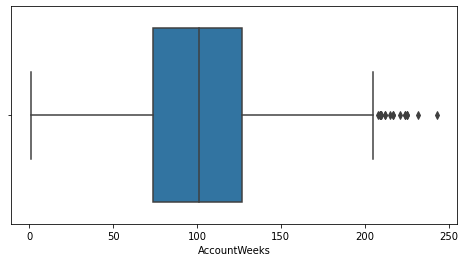

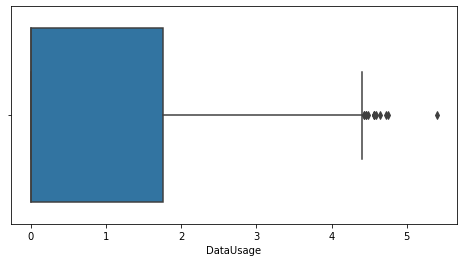

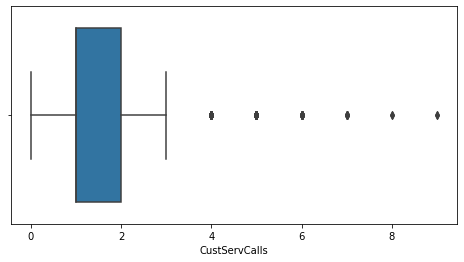

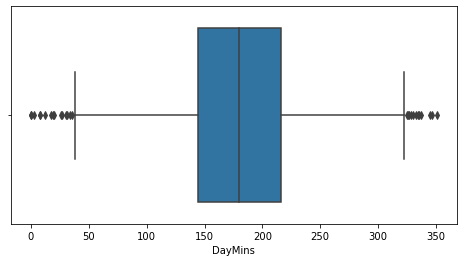

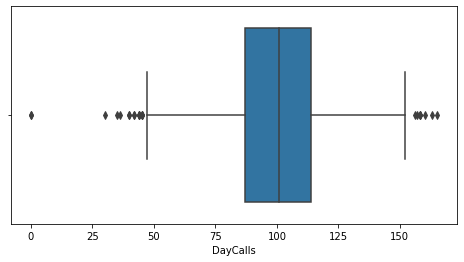

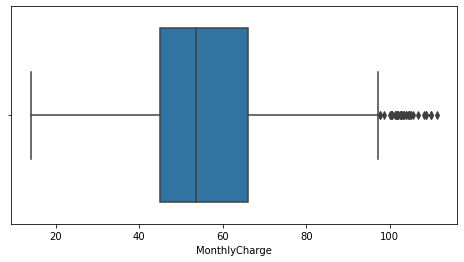

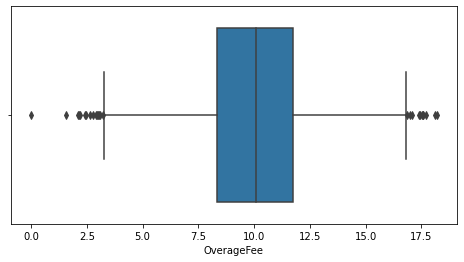

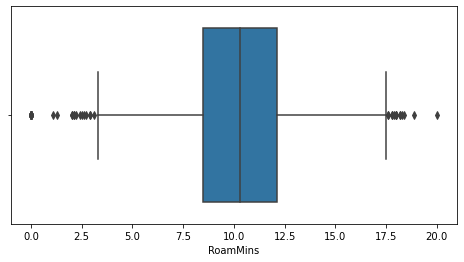

In [28]:
cols=['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins'];

for i in cols:
    sns.boxplot(cell_df[i])
    plt.show()


### Bi-Variate Analysis with Target variable

<b>Account Weeks and Churn</b>

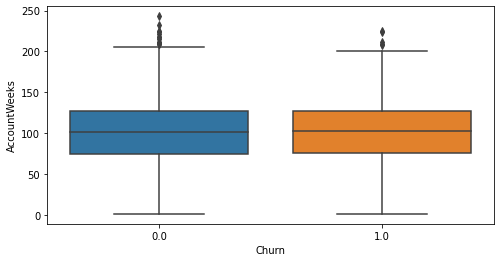

In [29]:
sns.boxplot(cell_df['Churn'],cell_df['AccountWeeks']);

<b>Data Usage against Churn</b>

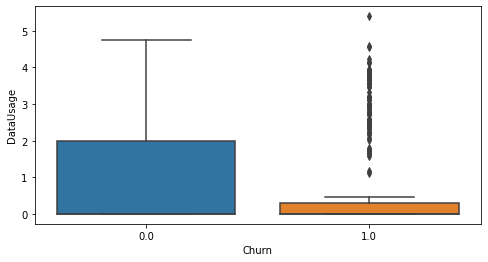

In [30]:
sns.boxplot(cell_df['Churn'],cell_df['DataUsage']);

<b>DayMins against Churn</b>

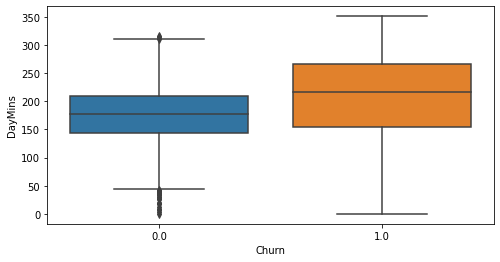

In [26]:
sns.boxplot(cell_df['Churn'],cell_df['DayMins']);

<b>DayCalls against Churn</b>

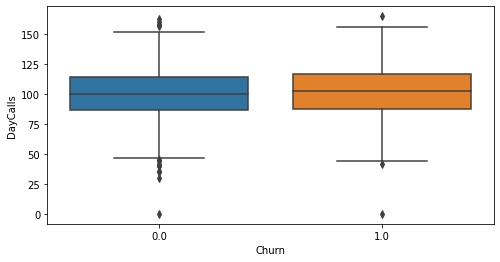

In [32]:
sns.boxplot(cell_df['Churn'],cell_df['DayCalls']);

<b>MonthlyCharge against Churn</b>

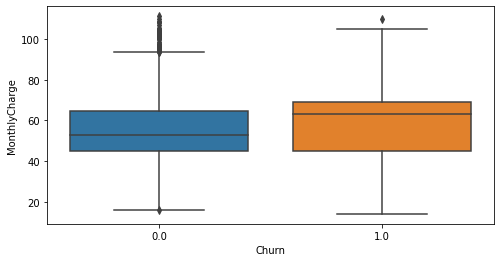

In [28]:
sns.boxplot(cell_df['Churn'],cell_df['MonthlyCharge']);

<b>OverageFee against Churn</b>

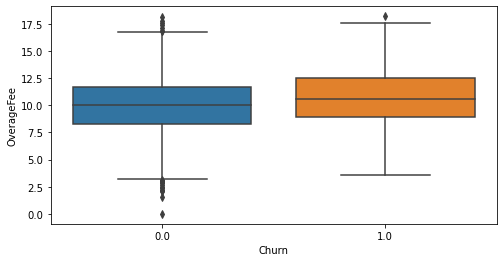

In [29]:
sns.boxplot(cell_df['Churn'],cell_df['OverageFee']);

<b>RoamMins against Churn</b>

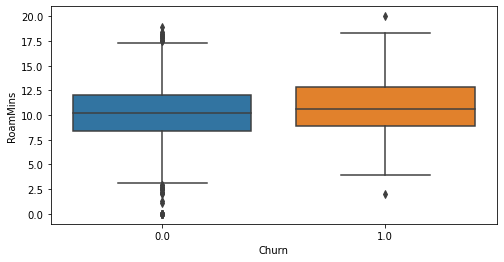

In [33]:
sns.boxplot(cell_df['Churn'],cell_df['RoamMins']);

<b>CustServCalls against Churn</b>

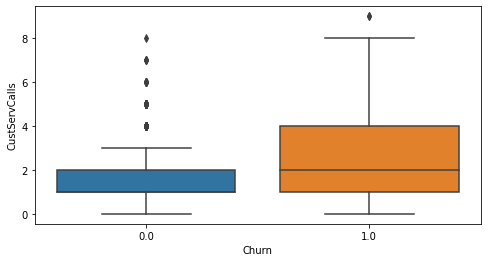

In [34]:
sns.boxplot(cell_df['Churn'],cell_df['CustServCalls']);

<b>Contract Renewal against Churn</b>

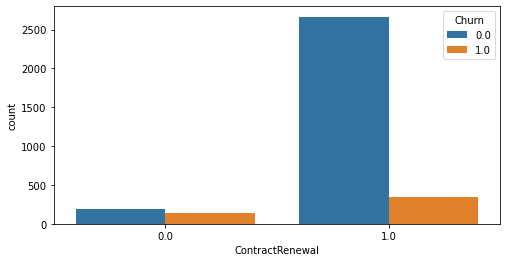

In [35]:
sns.countplot(cell_df['ContractRenewal'],hue=cell_df['Churn']);

<b>Data Plan against Churn</b>

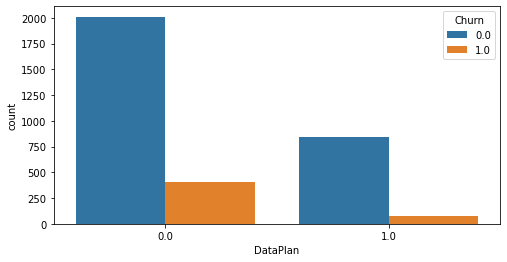

In [36]:
sns.countplot(cell_df['DataPlan'],hue=cell_df['Churn']);
# pd.crosstab(cell_df['DataPlan'],cell_df['Churn']).plot(kind='bar');

### Train (70%) - Test (30%) Split

In [38]:
# Creating a copy of the original data frame
df = cell_df.copy()

In [39]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [40]:
X = df.drop('Churn',axis=1)
Y = df.pop('Churn')

In [41]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [42]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (2333, 10)
Number of rows and columns of the training set for the dependent variable: (2333,)
Number of rows and columns of the test set for the independent variables: (1000, 10)
Number of rows and columns of the test set for the dependent variable: (1000,)


### LDA Model

In [43]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### Prediction

In [44]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [45]:
pred_class_train

array([0., 0., 0., ..., 0., 0., 0.])

### Training Data and Test Data Confusion Matrix Comparison

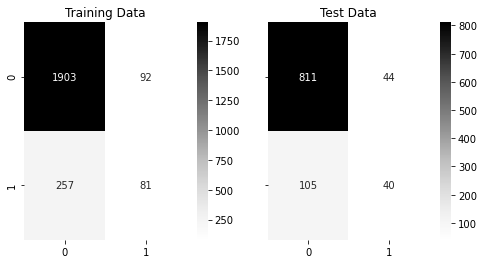

In [46]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [47]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1995
         1.0       0.47      0.24      0.32       338

    accuracy                           0.85      2333
   macro avg       0.67      0.60      0.62      2333
weighted avg       0.82      0.85      0.83      2333
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       855
         1.0       0.48      0.28      0.35       145

    accuracy                           0.85      1000
   macro avg       0.68      0.61      0.63      1000
weighted avg       0.83      0.85      0.83      1000
 



### Probability prediction for the training and test data

In [48]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [49]:
pred_prob_train[:,1]

array([0.02069932, 0.20179416, 0.15422548, ..., 0.10058096, 0.16733976,
       0.0528347 ])

AUC for the Training Data: 0.820
AUC for the Test Data: 0.829


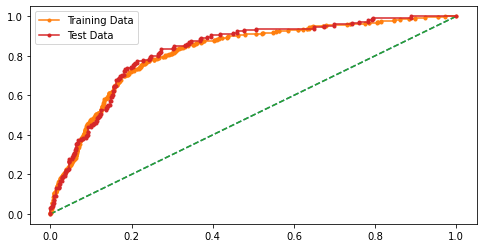

In [50]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

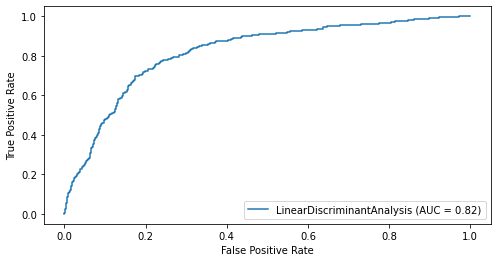

In [51]:
metrics.plot_roc_curve(clf,X_train,Y_train)


In [52]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

In [53]:
auc_train = metrics.roc_auc_score(Y_train,pred_train_prob[:,1])
auc_test = metrics.roc_auc_score(Y_test,pred_test_prob[:,1])

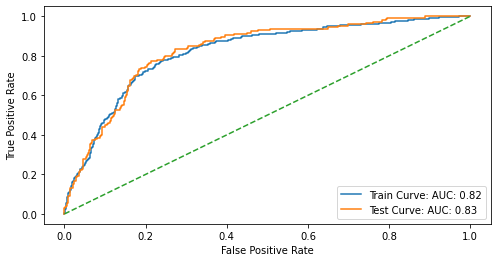

In [54]:
fig,ax=plt.subplots()
metrics.plot_roc_curve(model,X_train,Y_train,ax=ax, label = 'Train Curve: AUC: ' + str(round(auc_train,2)))
metrics.plot_roc_curve(model,X_test,Y_test,ax=ax, label = 'Test Curve: AUC: ' + str(round(auc_test,2)))
plt.plot([0, 1], [0, 1], linestyle='--')

# Conclusion

The model accuracy on the training as well as the test set is about 85%, which is roughly the same proportion as the class 0 observations in the dataset. 
This model is affected by a class imbalance problem.
Since we only have 3333 observations, if re-build the same LDA model with more number of data points, an even better model could be built.  

Please do go ahead ad try to build other classification algorithms learnt so far in the course and compare the performances of those.

# How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

0.1 

Accuracy Score 0.7167
F1 Score 0.4551 

Confusion Matrix


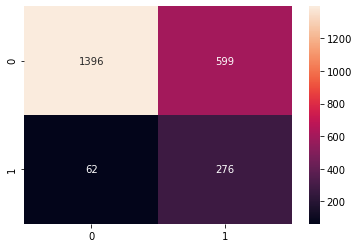

0.2 

Accuracy Score 0.8191
F1 Score 0.4952 

Confusion Matrix


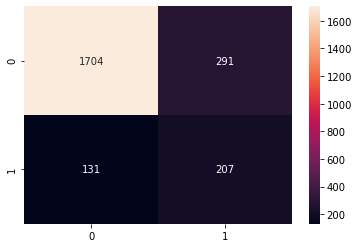

0.3 

Accuracy Score 0.8431
F1 Score 0.4404 

Confusion Matrix


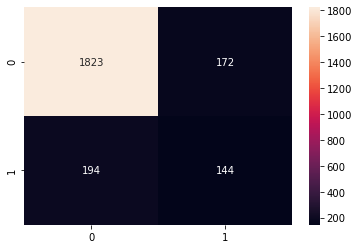

0.4 

Accuracy Score 0.8448
F1 Score 0.3649 

Confusion Matrix


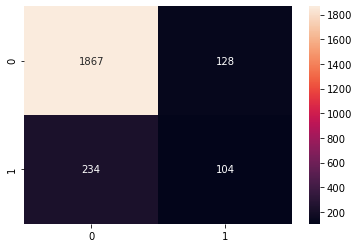

0.5 

Accuracy Score 0.8504
F1 Score 0.317 

Confusion Matrix


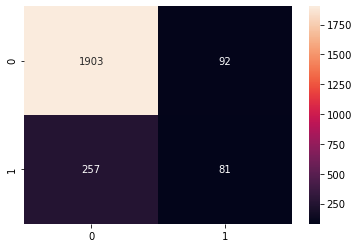

0.6 

Accuracy Score 0.8573
F1 Score 0.2808 

Confusion Matrix


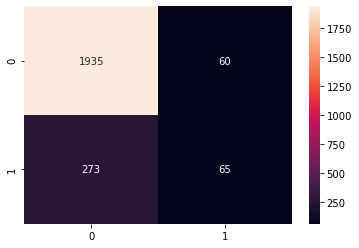

0.7 

Accuracy Score 0.8611
F1 Score 0.2212 

Confusion Matrix


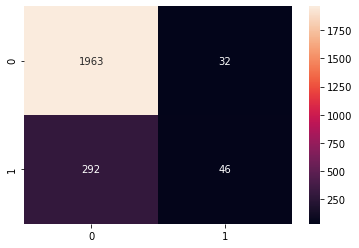

0.8 

Accuracy Score 0.8603
F1 Score 0.1376 

Confusion Matrix


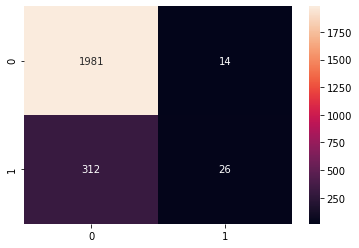

0.9 

Accuracy Score 0.8564
F1 Score 0.0346 

Confusion Matrix


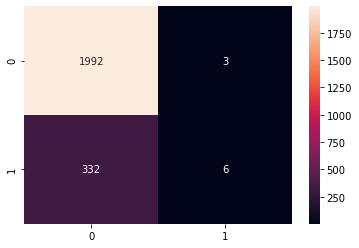

In [51]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [55]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)

pred_train_prob = pred_train_prob[:,1]

In [56]:
pred_train_prob

array([0.02069932, 0.20179416, 0.15422548, ..., 0.10058096, 0.16733976,
       0.0528347 ])

In [59]:

custom_prob = 0.1
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)


In [60]:
custom_cutoff_data

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [64]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score

In [65]:
accuracy_score(Y_train,custom_cutoff_data)

0.7166738105443635

In [66]:
f1_score(Y_train,custom_cutoff_data), recall_score(Y_train,custom_cutoff_data), precision_score(Y_train,custom_cutoff_data)

(0.4550700741962078, 0.8165680473372781, 0.31542857142857145)

In [62]:

def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [63]:
result = GetCustomData(0.1)
result

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [67]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [68]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [70]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(Y_train,result))
    f1.append(f1_score(Y_train,result))
    rec.append(recall_score(Y_train,result))
    pre.append(precision_score(Y_train,result))


In [71]:
pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})

,Threshold,Accuracy,f1,Recall,Precision
0,0.1,0.716674,0.455070,0.816568,0.315429
1,0.2,0.819117,0.495215,0.612426,0.415663
2,0.3,0.843120,0.440367,0.426036,0.455696
3,0.4,0.844835,0.364912,0.307692,0.448276
4,0.5,0.850407,0.317025,0.239645,0.468208
5,0.6,0.857265,0.280778,0.192308,0.520000
6,0.7,0.861123,0.221154,0.136095,0.589744
7,0.8,0.860266,0.137566,0.076923,0.650000
8,0.9,0.856408,0.034582,0.017751,0.666667


We see that 0.7 and 0.8 gives better accuracy than the rest of the custom cut-off values. But 0.2 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.2 to get the optimum 'f1' score.

Let us evaluate the predictions of the test data using these cut-off values.

In [79]:
pred_prob_test[:,1]

array([0.0749088 , 0.08869047, 0.02078955, 0.13884686, 0.11267881,
       0.01096042, 0.59652049, 0.13401934, 0.0349624 , 0.06400137,
       0.06070347, 0.05904024, 0.10734081, 0.02904649, 0.02580608,
       0.0253955 , 0.11393046, 0.05549587, 0.52749731, 0.0752321 ,
       0.76026265, 0.03548203, 0.0096606 , 0.62951867, 0.12275817,
       0.1060855 , 0.01581791, 0.22027075, 0.04502408, 0.00611066,
       0.02885654, 0.02323959, 0.0662713 , 0.28915054, 0.00909494,
       0.09883137, 0.06539326, 0.00527694, 0.03821684, 0.11473954,
       0.18836423, 0.13842352, 0.16086428, 0.06337512, 0.01458383,
       0.10807069, 0.4830092 , 0.01822827, 0.19490821, 0.04789976,
       0.01051092, 0.01012607, 0.25096273, 0.0153444 , 0.18943512,
       0.01914812, 0.01484272, 0.04924356, 0.02894338, 0.12610573,
       0.0158542 , 0.03477162, 0.34000285, 0.01812166, 0.04909387,
       0.05814133, 0.02858772, 0.17742544, 0.83480041, 0.04392275,
       0.08840972, 0.53161616, 0.15339078, 0.95177207, 0.03406

In [74]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

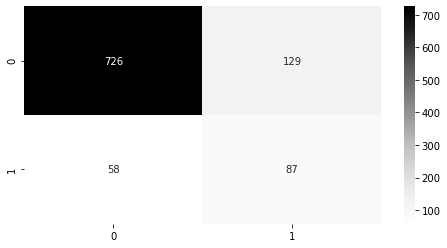

In [75]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [76]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       855
         1.0       0.48      0.28      0.35       145

    accuracy                           0.85      1000
   macro avg       0.68      0.61      0.63      1000
weighted avg       0.83      0.85      0.83      1000
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       855
         1.0       0.40      0.60      0.48       145

    accuracy                           0.81      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.85      0.81      0.83      1000
 



# END